In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import glob
import pickle

In [2]:
import joblib

In [2]:
with open('apple_model_80x80.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
# Load the model
# loaded_model = joblib.load('apple_model_80x80.joblib')

ValueError: Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['conv2d/kernel:0', 'conv2d/bias:0']

In [4]:
# Load the array from the file
normalized_features = np.load('raw_features_MainDataset_80x80.npy')
print(normalized_features.shape)

(44441, 256)


In [5]:
# target_size = (224, 224)
target_size = (80, 80)

In [6]:
similarity_scores_list = []
def get_similar_images(image_index, cosine_similarities, top_n=5):
    global similarity_scores_list
    # Get the pairwise similarity scores for the given image index
    similarity_scores = list(enumerate(cosine_similarities[image_index]))

    # Sort the images based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores_list = similarity_scores
    # Get the top similar images
    top_similar_images = similarity_scores[1:top_n+1]

    # Return the indices of the top similar images
    similar_image_indices = [index for index, _ in top_similar_images]

    return similar_image_indices 

In [7]:
#input_image_path = 'WhatsApp Image 2023-07-22 at 6.03.33 PM.jpeg'
input_image_path = 'WhatsApp Image 2023-07-22 at 6.47.45 PM.jpeg'


images = []
input_image = cv2.imread(input_image_path)
image = cv2.resize(input_image, target_size)

In [8]:
images.append(image)
resize_input = np.array(images)

features = loaded_model.predict(resize_input)

input_normalized_features = normalize(features)
#input_normalized_features = features

updated_features = np.vstack((normalized_features,input_normalized_features))

1/1 [==============================] - 0s 36ms/step


In [9]:
type(updated_features),updated_features.shape,updated_features.nbytes/(1024 ** 3)

(numpy.ndarray, (44442, 256), 0.08476638793945312)

In [10]:
# Normalize the data to unit length along the last axis (axis=1)
data_normalized = updated_features / np.linalg.norm(updated_features, axis=1, keepdims=True)

# Compute cosine similarity using matrix multiplication
cosine_similarities = np.dot(data_normalized, data_normalized.T)

In [11]:
# Compute the cosine similarity matrix
# cosine_similarities = cosine_similarity(updated_features)

In [12]:
cosine_similarities.shape

(44442, 44442)

Input Image:


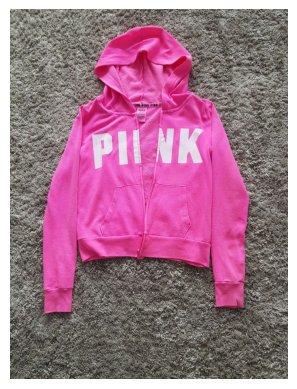

Similar Images:


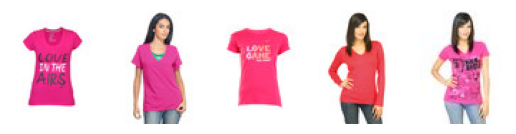

In [13]:
image_dir = 'images'
image_paths = glob.glob(image_dir + '/*.jpg')

image_index = -1
similar_image_indices = get_similar_images(image_index, cosine_similarities)
 
# Retrieve the details of the similar images from the image paths
similar_images = [image_paths[index] for index in similar_image_indices]

print('Input Image:')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print('Similar Images:')
# Display the recommended similar images
for i, image_path in enumerate(similar_images):
    image = cv2.imread(image_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()